<a href="https://colab.research.google.com/github/georgie-talukdar/masters/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 13a: Naive Bayes Classifier

In this part of the practical you're going to develop a SPAM detection Machine Learning tool similar to the one discussed in the lectures. We will use a Naive Bayes classifier to separate ham from spam. Where ham is a message you want to recieve whilst spam is a message you don't want to recieve.

First let's set up some libraries we're going to use.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

## The data

We're going to use a SMS (text message) dataset for this exercise.

The data is a variant of the data from the Kaggle dataset (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset). It has been cleaned up to make it usable here. Please use the copy from http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/spam.csv. 

In [54]:
spam = pd.read_csv('http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/spam.csv', encoding='ISO-8859-1')

Let's take a quick look at the data. Each row contains a class label (either ham or spam) followed by the text from the SMS message.

In [55]:
spam

,class,text
0,ham,Go until jurong point. crazy.. Available only ...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf. he lives aro...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,Pity. * was in mood for that. So...any other s...
5570,ham,The guy did some bitching but I acted like i'd...


We now split the two colums into the feature (as there's only the text) and the lable.

In [56]:
X = spam['text']
y = spam['class']

Let's check this

In [57]:
X

0       Go until jurong point. crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf. he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will _ b going to esplanade fr home?
5569    Pity. * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [58]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: class, Length: 5572, dtype: object

How many examples of spam and ham do we have?

In [59]:
y.value_counts()

ham     4825
spam     747
Name: class, dtype: int64

We now need to split the data into a training set and a test set. We shall keep 20% for testing.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The feature data needs to be converted into numeric values which can be used by the Naive Bayes classifier. We need to break it up into individual words and count how many times each of these words appear in each text message.

SkLearn nicely provides a CountVectorizer tool for us. It takes in a list of documents (the text messages for us) and outputs a matrix with each row representing an original document and each column representing the count of how many words were in that doucment for a particular word. So for example if the original documents were:

The cat sat on the mat
The mat was on the floor

Then the matrix returned could look like:

    #| cat | floor | mat | on | sat | the |
    +------+-------+-----+----+-----+-----+
    1| 1   | 0     | 1   | 1  | 1   |  2  |
    2| 0   | 1     | 1   | 1  | 0   |  2  |

First we create a vectorizer and specify how we want to break up the words. Then we fit the vectorizer to our text data.

Let's see what we have here. First let's output the words that it's found for the columns.

These don't look much like real words - but that's because it's putting things like '00' first. So let's get it to output more:

To start with most of the 'words' are phone numbers. You'll need to search a bit further through the data for some real words. 

##Exercise:
Change the range of the output above till you find some real words.

We're going to ignore the fact that this vectorisation contains a lot of numbers. Perhaps this will make identifying ham from spam easier. Now let's produce the rows for our matrix by transforming our training data into vectors.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
X_train_tfidf.shape
X_test_tfidf.shape

(1115, 7734)

We could, at this stage convert these counts into probabilites as we did in the lecture. However, the MultinomialNB can quite happily cope with the counts. So let's create out classifier and train it.

In [92]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

We now have our Naive Bayes classifier - we should test to see how good it is.

## Exercise:
Let's compute the accuracy on our test data. Remember, first we need to convert our X_test data into a vector format. We can do this the same as above. Then predict the labels and test the results.

In [96]:

y_predict = clf.predict(X_test_tfidf)

print('Accuracy(MultinomialNB) = ', clf.score(X_test_tfidf, y_test))


Accuracy(SVC) =  0.9596412556053812


In [107]:
import numpy as np
np.mean(y_predict == y_test)

0.9596412556053812

That's pretty good for a simple Naive Bayes classifier. We should look at some other statistics.

# Exercise:
Construct the confusion matrix for your test results. You've done this before in some other practicals.



[[942   0]
 [ 45 128]]


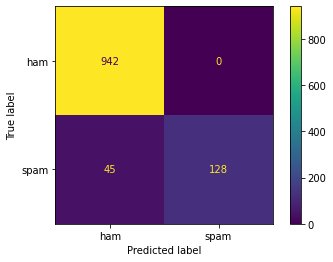

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
print(cm)

# The Confusion matrix as text isn't easy to read - so let's make into a figure
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()
plt.show()

## Extension Exercises:
In the documentation for CountVectorizer (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names_out) there's a number of manipulations you can apply to the data as you vectorize (such as removing stop words - common words like a, the, it, converting all text to lowercase - so Cat and cat are the same, stripping accents or changing the token pattern). See how these affect the performance of the classifier.